<p><h1>Analysing consumption habits</h1></p>

During the pandemic caused by Sars-cov 19 I was in Chile as an inmigrant. I had just arrived on January 17th 2020 at the Capital Santiago with my mother, an eldery (74). Furtunately I found a convenient located appartment next to the supermarket "Lider" which is the Chilean version of Walmart.

Since the confinement started on March 22th. We decided to go out only once a week to buy groceries, preferably during non-busy hours (around 9am). Since I was unemployed I rigorously controled my budget, and doing so I kept all the receipts from the grocery store, then after almost a year I had 56 receipts from January 17th to September 28th of this peculiar 2020.

In the next lines I will show you How did I analyse the data from the groceries store's receipts.

<p><h1>The data</h1></p>
This is how one of those <a href="https://drive.google.com/file/d/1UBuSZwed86JgsYzJH0pmkTx4Lo_oitp1/view?usp=sharing">receipts</a> looks like. Well, my first approach to extract the data from the receipts was to scan it using th Goggle Drive functionality, and after that, to use google vision API to convert the pdf file to text and this was the <a href="https://drive.google.com/file/d/10v3jhFpseSjfe4ou2N1j2Wkr5FRd2wmK/view?usp=sharing" >result</a>. I asked for help on regular expressions and my friend @madacol helped me with this <a href="https://regex101.com/r/cr2Acv/3/">regex</a> that was able to detect 4 important fields (product_id, quantity, product_description and unit_price). But due to the format it only detected 26 out of 30 items in the receipt.

In order to find a solution to this issue I found that this particular company offered the option to download the receipt in a digital format through their website. So this was actually what I did. Since the original data was in a pdf format and not a scan like my previous try I found out that this helped a lot in data quality. Here is the same receipt but in it original pdf format.

Convinced that this was the best type for my data I manually downloaded the receipts. If anybody knows how to do it automatically please let me know. So, here you will find the <a href="https://drive.google.com/file/d/1cl0NC4IE9-H6zNncszAjTW1GglVdRhB-/view?usp=sharing">71 receipts</a>. I copy and pasted the context of the pdf files and using a regexp extracted the previously mentioned fields and put them in into excel to finally get this <a href= "https://drive.google.com/file/d/1dGW79fTzNIZ7-MvF3nmnR1hOYn71fTHU/view?usp=sharing">dataset</a>.

### Read a CSV file


In [1]:
import pandas as pd
from datetime import datetime


df = pd.read_excel('DATA.xlsx', encoding= "utf-8")

In [2]:
df.head()

,BOLETA ELECTRONICA,LOCAL,CAJA,CAJERO,FECHA EMISION,HORA,TRAN. Nº,CODIGO,CANT.,PRECIO UNIT.,DESC. ARTICULO,VALOR,TOTAL AFECTO,TOTAL IVA,TOTAL,TOTAL ARTICULOS,ATENDIDO POR
0,1490873643,682,12,67,2020-01-17,11:52:00,63,7.798160e+12,1.0,990,BOLSA PLA GR,990,21972,4175,26147,18,XIMENA QUIROZ
1,1490873643,682,12,67,2020-01-17,11:52:00,63,7.803601e+12,1.0,790,SAL YODADA L,790,21972,4175,26147,18,XIMENA QUIROZ
2,1490873643,682,12,67,2020-01-17,11:52:00,63,4.000068e+11,1.0,990,MUG IVORY,990,21972,4175,26147,18,XIMENA QUIROZ
3,1490873643,682,12,67,2020-01-17,11:52:00,63,8.410721e+12,1.0,1290,CHORITOS AHU,1290,21972,4175,26147,18,XIMENA QUIROZ
4,1490873643,682,12,67,2020-01-17,11:52:00,63,4.000069e+11,1.0,1250,ATUN AHUMADO,1250,21972,4175,26147,18,XIMENA QUIROZ


In [3]:
df.tail()

,BOLETA ELECTRONICA,LOCAL,CAJA,CAJERO,FECHA EMISION,HORA,TRAN. Nº,CODIGO,CANT.,PRECIO UNIT.,DESC. ARTICULO,VALOR,TOTAL AFECTO,TOTAL IVA,TOTAL,TOTAL ARTICULOS,ATENDIDO POR
1556,1680354484,682,22,493,2020-12-28,18:29:00,145,7.804602e+12,1.0,610,ZAPALLO ITAL,610,44678,8489,53167,28,CAJERO EXRERNO
1557,1680354484,682,22,493,2020-12-28,18:29:00,145,7.804930e+12,1.0,1230,LIMP CREMA,1230,44678,8489,53167,28,CAJERO EXRERNO
1558,1680354484,682,22,493,2020-12-28,18:29:00,145,7.801320e+12,1.0,1650,ACEITE MARA.,1650,44678,8489,53167,28,CAJERO EXRERNO
1559,1680354484,682,22,493,2020-12-28,18:29:00,145,7.802636e+12,1.0,1490,MRRQTA ATM,1490,44678,8489,53167,28,CAJERO EXRERNO
1560,1680354484,682,22,493,2020-12-28,18:29:00,145,NaN,1.0,-900,Descuento Global,-900,44678,8489,53167,28,CAJERO EXRERNO


In [4]:
df.columns


Index(['BOLETA ELECTRONICA ', 'LOCAL', 'CAJA', 'CAJERO', 'FECHA EMISION',
       'HORA', 'TRAN. Nº', 'CODIGO', 'CANT.', 'PRECIO UNIT.', 'DESC. ARTICULO',
       'VALOR', 'TOTAL AFECTO', 'TOTAL IVA', 'TOTAL', 'TOTAL ARTICULOS ',
       'ATENDIDO POR'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561 entries, 0 to 1560
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   BOLETA ELECTRONICA   1561 non-null   int64         
 1   LOCAL                1561 non-null   int64         
 2   CAJA                 1561 non-null   int64         
 3   CAJERO               1561 non-null   int64         
 4   FECHA EMISION        1561 non-null   datetime64[ns]
 5   HORA                 1561 non-null   object        
 6   TRAN. Nº             1561 non-null   int64         
 7   CODIGO               1518 non-null   float64       
 8   CANT.                1561 non-null   float64       
 9   PRECIO UNIT.         1561 non-null   int64         
 10  DESC. ARTICULO       1561 non-null   object        
 11  VALOR                1561 non-null   int64         
 12  TOTAL AFECTO         1561 non-null   int64         
 13  TOTAL IVA            1561 non-nul

In [6]:
df['CODIGO'] =  df['CODIGO'].astype(str)

In [7]:
df['FECHA EMISION'] =  pd.to_datetime(df['FECHA EMISION'] )

In [8]:
df['FECHA EMISION'] =  pd.to_datetime(df['FECHA EMISION'], format='%d/%m/%Y' )

### 1.How much money have I spent in total in CLP?


In [9]:
df['VALOR'].sum()

2761427

### 2.Which is the most expensive item I have purchased?


In [10]:
df.loc[(df['PRECIO UNIT.'] == df['PRECIO UNIT.'].max())]


,BOLETA ELECTRONICA,LOCAL,CAJA,CAJERO,FECHA EMISION,HORA,TRAN. Nº,CODIGO,CANT.,PRECIO UNIT.,DESC. ARTICULO,VALOR,TOTAL AFECTO,TOTAL IVA,TOTAL,TOTAL ARTICULOS,ATENDIDO POR
1082,501305190,682,35,64,2020-09-21,08:44:00,2,7802502113089.0,1.0,22900,AUDIF. GAMER,22900,19319,3671,22990,1,VENDEDORINTEGRAL TUR


### 3. Which are the items I purchased most often?

In [11]:
df['DESC. ARTICULO'].value_counts()[0:10] # Based on the product description


Descuento Global    43
YOGHURT BOLS        34
PLATANO             32
HUEVO GRANDE        24
PALTA HASS          22
POLLO ENTERO        20
TOMATES             18
M MANI CRUN         17
HARINA BLCA         16
CHAMPINON BA        15
Name: DESC. ARTICULO, dtype: int64

In [12]:
df['CODIGO'].nunique() # Based on the product code (SKU)



600

In [13]:
df.loc[df['CODIGO']== '2000140000005.0'][0:1]

,BOLETA ELECTRONICA,LOCAL,CAJA,CAJERO,FECHA EMISION,HORA,TRAN. Nº,CODIGO,CANT.,PRECIO UNIT.,DESC. ARTICULO,VALOR,TOTAL AFECTO,TOTAL IVA,TOTAL,TOTAL ARTICULOS,ATENDIDO POR
21,1525186435,682,6,133,2020-01-17,15:25:00,71,2000140000005.0,0.845,920,PLATANO,777,18936,3598,22534,16,CLAUDIA JORQUERA


### 4. How much did I spent each month?


In [14]:
df.index = pd.to_datetime(df['FECHA EMISION'],format='%Y-%m-/d%')
df.groupby(by=[df.index.month])
df['VALOR'].groupby(pd.Grouper(freq="M")).sum()


FECHA EMISION
2020-01-31    189241
2020-02-29    116855
2020-03-31    146392
2020-04-30    249482
2020-05-31    340434
2020-06-30    239500
2020-07-31    269492
2020-08-31    242401
2020-09-30    249147
2020-10-31    240338
2020-11-30    181282
2020-12-31    296863
Freq: M, Name: VALOR, dtype: int64

### 5. In which months did I spend the most?


In [15]:
df['VALOR'].groupby(pd.Grouper(freq="M")).sum().sort_values(ascending=False)


FECHA EMISION
2020-05-31    340434
2020-12-31    296863
2020-07-31    269492
2020-04-30    249482
2020-09-30    249147
2020-08-31    242401
2020-10-31    240338
2020-06-30    239500
2020-01-31    189241
2020-11-30    181282
2020-03-31    146392
2020-02-29    116855
Name: VALOR, dtype: int64

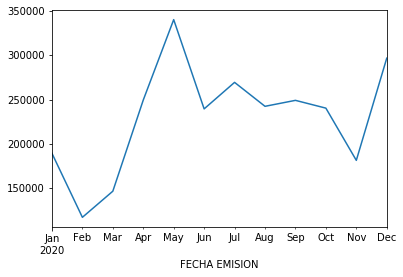

In [16]:
df['VALOR'].groupby(pd.Grouper(freq="M")).sum().plot()


### 6. In which day of the week did I purchased most items?


In [17]:
# Let's break the date field to month,day,week,dayofweek,

df['MES']= df['FECHA EMISION'].dt.month
df['DIA']= df['FECHA EMISION'].dt.day
df['#SEMANA'] = df['FECHA EMISION'].dt.week
df['DIA_DE_SEMANA'] = df['FECHA EMISION'].dt.dayofweek
df

,BOLETA ELECTRONICA,LOCAL,CAJA,CAJERO,FECHA EMISION,HORA,TRAN. Nº,CODIGO,CANT.,PRECIO UNIT.,...,VALOR,TOTAL AFECTO,TOTAL IVA,TOTAL,TOTAL ARTICULOS,ATENDIDO POR,MES,DIA,#SEMANA,DIA_DE_SEMANA
FECHA EMISION,,,,,,,,,,,,,,,,,,,,,
2020-01-17,1490873643,682,12,67,2020-01-17,11:52:00,63,7798160461771.0,1.0,990,...,990,21972,4175,26147,18,XIMENA QUIROZ,1,17,3,4
2020-01-17,1490873643,682,12,67,2020-01-17,11:52:00,63,7803600981525.0,1.0,790,...,790,21972,4175,26147,18,XIMENA QUIROZ,1,17,3,4
2020-01-17,1490873643,682,12,67,2020-01-17,11:52:00,63,400006849151.0,1.0,990,...,990,21972,4175,26147,18,XIMENA QUIROZ,1,17,3,4
2020-01-17,1490873643,682,12,67,2020-01-17,11:52:00,63,8410721070831.0,1.0,1290,...,1290,21972,4175,26147,18,XIMENA QUIROZ,1,17,3,4
2020-01-17,1490873643,682,12,67,2020-01-17,11:52:00,63,400006926395.0,1.0,1250,...,1250,21972,4175,26147,18,XIMENA QUIROZ,1,17,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-28,1680354484,682,22,493,2020-12-28,18:29:00,145,7804602170184.0,1.0,610,...,610,44678,8489,53167,28,CAJERO EXRERNO,12,28,53,0
2020-12-28,1680354484,682,22,493,2020-12-28,18:29:00,145,7804930000306.0,1.0,1230,...,1230,44678,8489,53167,28,CAJERO EXRERNO,12,28,53,0
2020-12-28,1680354484,682,22,493,2020-12-28,18:29:00,145,7801320220061.0,1.0,1650,...,1650,44678,8489,53167,28,CAJERO EXRERNO,12,28,53,0


In [18]:
dw_mapping={
    0: 'Lunes', 
    1: 'Martes', 
    2: 'Miércoles', 
    3: 'Jueves', 
    4: 'Viernes',
    5: 'Sábado', 
    6: 'Domingo'
}

In [19]:
df['DIA_DE_SEMANA'].map(dw_mapping).value_counts()


Viernes      797
Martes       361
Lunes        166
Sábado       120
Miércoles     62
Domingo       30
Jueves        25
Name: DIA_DE_SEMANA, dtype: int64

### 7. How many times did I go to the supermarket?

In [20]:
df['FECHA EMISION'].nunique() # Determine how many diferent days did I went to the grocery store


66

### 8. In which day of the week did I purchased most often?


In [21]:

# to now how many items per day add ,'count' to agg parameters
df['FECHA EMISION'].groupby(df['DIA_DE_SEMANA'].map(dw_mapping)).agg(['nunique'])

,nunique
DIA_DE_SEMANA,
Domingo,3
Jueves,4
Lunes,10
Martes,13
Miércoles,5
Sábado,5
Viernes,26


### 9. How many different products have I purchased?


In [22]:
df['CODIGO'].nunique() # Based on the product code (SKU)


600

### 9. How much have I spent in the most frequent purchased item per month?


In [23]:
# First I will find the most frequent purchased item
most_frequent_item = df['DESC. ARTICULO'].value_counts()
most_frequent_item

Descuento Global    43
YOGHURT BOLS        34
PLATANO             32
HUEVO GRANDE        24
PALTA HASS          22
                    ..
CILANTRO BO          1
SALAME IT            1
YOGHURT BAT.         1
 HUEVO EXTRA         1
 BUTTER CHOC         1
Name: DESC. ARTICULO, Length: 615, dtype: int64

In [24]:
# Let's see what item corresponds to SKU 2000140000005         
df.loc[df['CODIGO']=='2000140000005.0']

,BOLETA ELECTRONICA,LOCAL,CAJA,CAJERO,FECHA EMISION,HORA,TRAN. Nº,CODIGO,CANT.,PRECIO UNIT.,...,VALOR,TOTAL AFECTO,TOTAL IVA,TOTAL,TOTAL ARTICULOS,ATENDIDO POR,MES,DIA,#SEMANA,DIA_DE_SEMANA
FECHA EMISION,,,,,,,,,,,,,,,,,,,,,
2020-01-17,1525186435,682,6,133,2020-01-17,15:25:00,71,2000140000005.0,0.845,920,...,777,18936,3598,22534,16,CLAUDIA JORQUERA,1,17,3,4
2020-01-19,1394375917,682,21,210,2020-01-19,11:56:00,82,2000140000005.0,0.890,920,...,819,14997,2849,17846,13,ESTELA GUERRA,1,19,3,6
2020-01-24,1491000422,682,19,210,2020-01-24,17:53:00,103,2000140000005.0,1.090,920,...,1003,21298,4047,25345,16,ESTELA GUERRA,1,24,4,4
2020-02-02,1562944868,682,18,290,2020-02-02,12:16:00,105,2000140000005.0,1195.000,920,...,1099,15086,2866,17952,14,GINETTE TEJO,2,2,5,6
2020-02-17,1491004225,682,19,163,2020-02-17,17:03:00,73,2000140000005.0,1185.000,920,...,1090,8101,1539,9640,6,HAYDEE LABRIN,2,17,8,0
2020-03-04,1525263291,682,23,381,2020-03-04,18:07:00,4,2000140000005.0,0.925,920,...,851,24648,4683,29331,16,JOCELINE MANQUIAN,3,4,10,2
2020-03-12,1525213870,682,30,281,2020-03-12,17:42:00,112,2000140000005.0,1.120,990,...,1109,6251,1188,7439,4,VIVIANA VALENZUELA,3,12,11,3
2020-03-27,1562956966,682,18,6,2020-03-27,09:24:00,9,2000140000005.0,0.785,990,...,777,43736,8310,52046,25,MARIA EUGENIA CALDER,3,27,13,4
2020-04-03,1593110927,682,14,352,2020-04-03,10:00:00,6,2000140000005.0,0.785,990,...,777,42057,7991,50048,31,CAJERO EXTERNO2,4,3,14,4


In [25]:
# new =df.loc[(df.DESC =='PLATANO')]
# new.PRECIO_TOTAL.groupby(pd.Grouper(freq="M")).sum().plot()
# df.loc[(df['Cod. Producto'] ==2000140000005)].df['Precio Total'].groupby(pd.Grouper(freq="M")).sum().plot()

### 10. How much have changed the price of the most frequent purchased item?


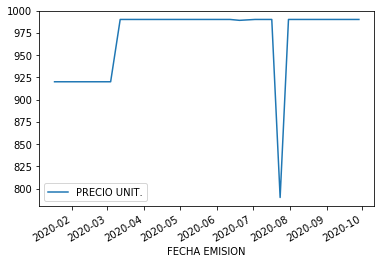

In [26]:
df.loc[(df['DESC. ARTICULO'] =='PLATANO')].plot(x='FECHA EMISION', y='PRECIO UNIT.')


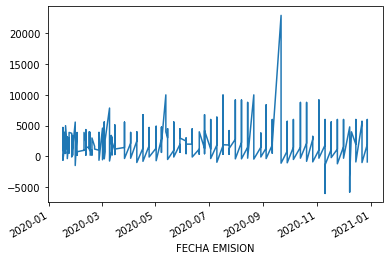

In [27]:
df['PRECIO UNIT.'].plot(x='FECHA EMISION', y='PRECIO UNIT.')

### 11. How much did I spent on weekly basis?


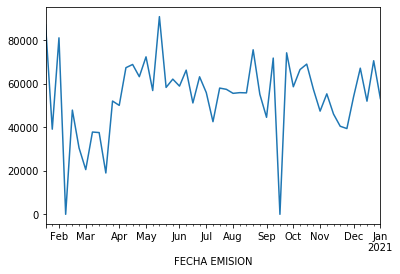

In [28]:
df['VALOR'].groupby(pd.Grouper(freq="W")).sum().plot()


In [29]:
df['VALOR'].groupby(pd.Grouper(freq="W")).sum()


FECHA EMISION
2020-01-19    86998
2020-01-26    39115
2020-02-02    81080
2020-02-09        0
2020-02-16    47876
2020-02-23    30485
2020-03-01    20542
2020-03-08    37799
2020-03-15    37557
2020-03-22    18990
2020-03-29    52046
2020-04-05    50048
2020-04-12    67365
2020-04-19    68841
2020-04-26    63228
2020-05-03    72347
2020-05-10    56865
2020-05-17    90816
2020-05-24    58299
2020-05-31    62107
2020-06-07    58906
2020-06-14    66242
2020-06-21    51165
2020-06-28    63187
2020-07-05    55928
2020-07-12    42553
2020-07-19    58003
2020-07-26    57425
2020-08-02    55583
2020-08-09    55892
2020-08-16    55795
2020-08-23    75593
2020-08-30    55121
2020-09-06    44568
2020-09-13    71779
2020-09-20        0
2020-09-27    74197
2020-10-04    58603
2020-10-11    66505
2020-10-18    69010
2020-10-25    57416
2020-11-01    47407
2020-11-08    55344
2020-11-15    46078
2020-11-22    40460
2020-11-29    39400
2020-12-06    54020
2020-12-13    67140
2020-12-20    51979
2020-1

### Find all rows that contain a specific word


In [35]:
df[df['DESC. ARTICULO'].str.contains('TOMATES')].count()#.df['Precio Total'].sum()


BOLETA ELECTRONICA     21
LOCAL                  21
CAJA                   21
CAJERO                 21
FECHA EMISION          21
HORA                   21
TRAN. Nº               21
CODIGO                 21
CANT.                  21
PRECIO UNIT.           21
DESC. ARTICULO         21
VALOR                  21
TOTAL AFECTO           21
TOTAL IVA              21
TOTAL                  21
TOTAL ARTICULOS        21
ATENDIDO POR           21
MES                    21
DIA                    21
#SEMANA                21
DIA_DE_SEMANA          21
dtype: int64